# 1. Цель лабораторной работы
Изучить способы предварительной обработки данных для дальнейшего формирования моделей.

# 2. Задание:
1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
+ устранение пропусков в данных;
+ кодирование категориальных признаков;
+ нормализацию числовых признаков.

# 3. Ход выполнения работы
Подключим все необходимые библиотеки и настроим отображение графиков:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline
from IPython import display
sns.set(style="ticks")

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на А4:

In [2]:
pd.set_option("display.width",70)

Продолжайте использовать набор данных из эксперимента 1.

In [3]:
data = pd.read_csv("WorldIndex.csv")

Посмотрим на эти наборы данных:

In [4]:
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [5]:
data.dtypes

Country             object
Continent           object
Life_expectancy    float64
GDP_per_capita     float64
Population         float64
dtype: object

In [6]:
data.shape

(177, 5)

## 3.1. Обработка пропусков в данных

In [7]:
data.isnull().sum()

Country            0
Continent          0
Life_expectancy    8
GDP_per_capita     8
Population         1
dtype: int64

In [8]:
[(c, data[c].isnull().mean()) for c in data]# Доля (процент) пропусков

[('Country', 0.0),
 ('Continent', 0.0),
 ('Life_expectancy', 0.04519774011299435),
 ('GDP_per_capita', 0.04519774011299435),
 ('Population', 0.005649717514124294)]

Очевидно, что в наборе данных не так много пропущенных данных. С учетом практических факторов отсутствие соответствующих данных связано с тем, что данные по этой стране нелегко подсчитать, и это может быть небольшая страна, и считается, что ее можно удалить. 

In [9]:
cols_with_na_temp = ['Life_expectancy', 'GDP_per_capita',  'Population']
# Колонки для которых удаляются пропуски

In [10]:
# Удаление пропусков
data_drop = data[cols_with_na_temp].dropna()
data_drop.shape

(164, 3)

In [11]:
def plot_hist_diff(old_ds, new_ds, cols):
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=40, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=40, ax=ax, density=True, color='blue', alpha=0.5)
        plt.show()

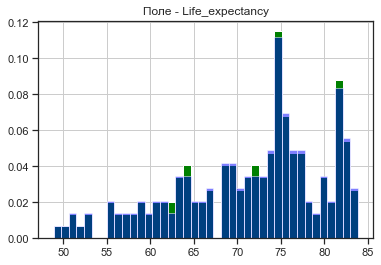

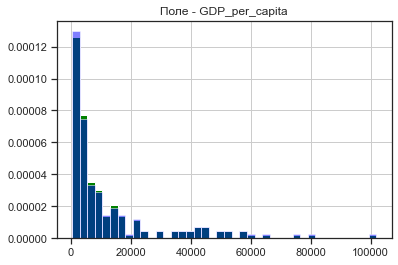

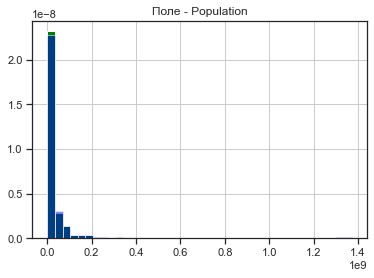

In [12]:
plot_hist_diff(data, data_drop, cols_with_na_temp)

Очевидно, что удаление отсутствующих данных мало влияет.

## 3.2. Кодирование категориальных признаков

Рассмотрим колонку Continent:

In [13]:
continents=data["Continent"].dropna().astype(str)
continents.value_counts()

Africa           50
Europe           45
Asia             36
North America    20
Oceania          14
South America    12
Name: Continent, dtype: int64

Выполним кодирование категорий целочисленными значениями:

In [14]:
le=sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(continents)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1 2 3 4 5]


array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

Выполним кодирование категорий наборами бинарных значений:

In [15]:
continents_one_hot=pd.get_dummies(continents)
continents_one_hot.head()

,Africa,Asia,Europe,North America,Oceania,South America
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [16]:
continents_one_hot[continents_one_hot["Asia"]==1].head()

,Africa,Asia,Europe,North America,Oceania,South America
50,0,1,0,0,0,0
51,0,1,0,0,0,0
52,0,1,0,0,0,0
53,0,1,0,0,0,0
54,0,1,0,0,0,0


Остальные континенты здесь не перечислены.

## 3.3. Нормализацию числовых признаков.
Подключим библиотеку：

In [17]:
import scipy.stats as stats

In [18]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot = plt)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          164 non-null    object 
 1   Continent        164 non-null    object 
 2   Life_expectancy  164 non-null    float64
 3   GDP_per_capita   164 non-null    float64
 4   Population       164 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


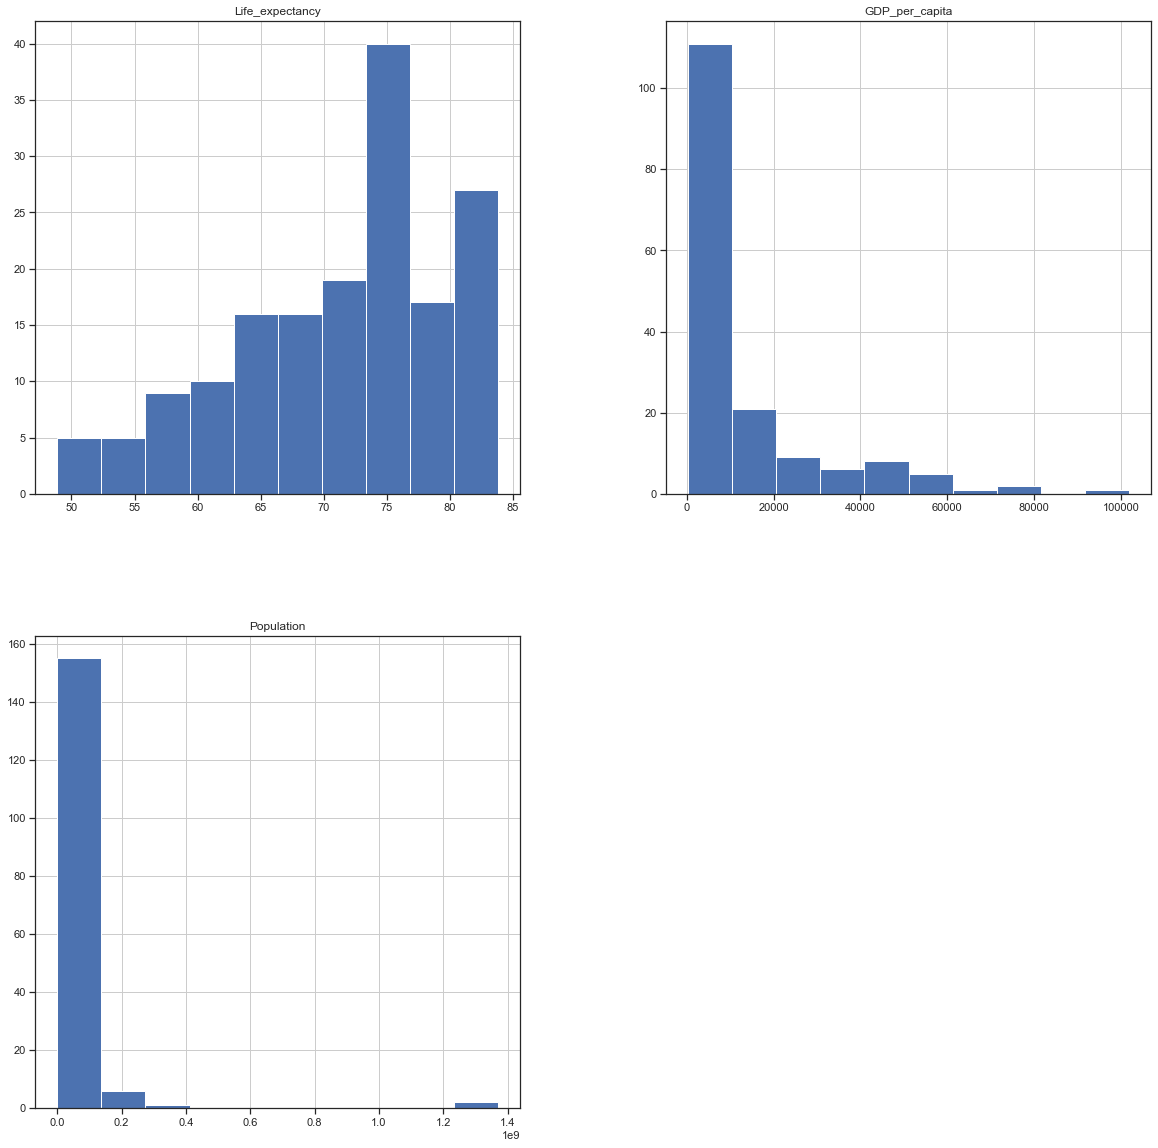

In [19]:
data_clean = data.dropna()
data_clean.info()
data_clean.hist(figsize=(20,20))
plt.show()

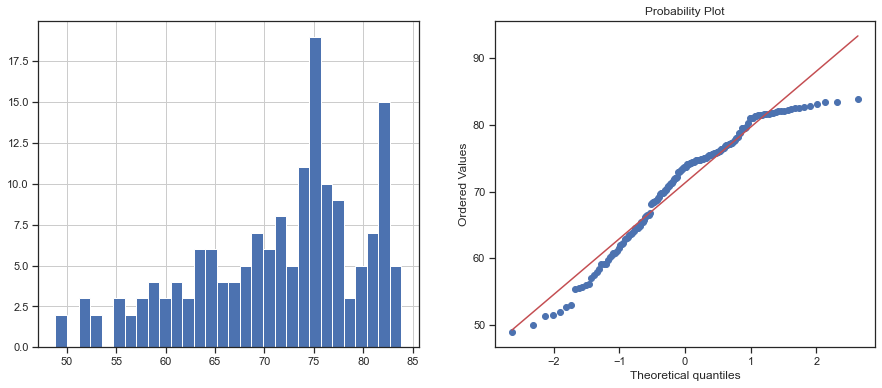

In [34]:
diagnostic_plots(data_clean, 'Life_expectancy')

Логарифмическое преобразование


C:\Users\23882\AppData\Local\Temp\ipykernel_3248\392939244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_log'] = np.log(data_clean['Life_expectancy'])


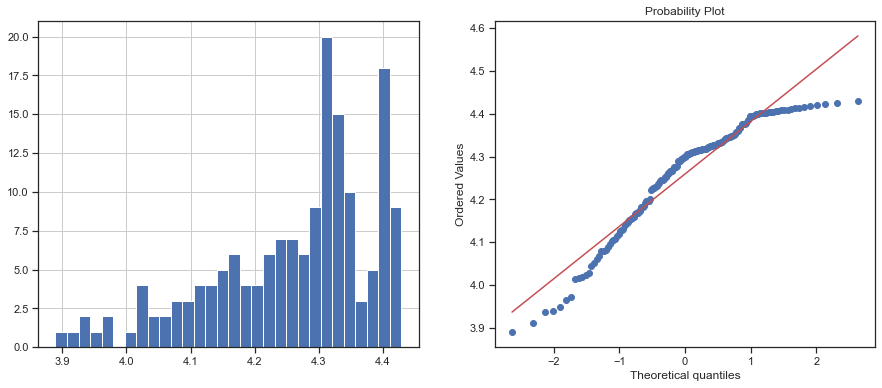

In [35]:
data_clean['Life_expectancy_log'] = np.log(data_clean['Life_expectancy'])
diagnostic_plots(data_clean, 'Life_expectancy_log')

Обратное преобразование   


C:\Users\23882\AppData\Local\Temp\ipykernel_3248\3435170074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_reciprocal'] = 1 / (data_clean['Life_expectancy'])


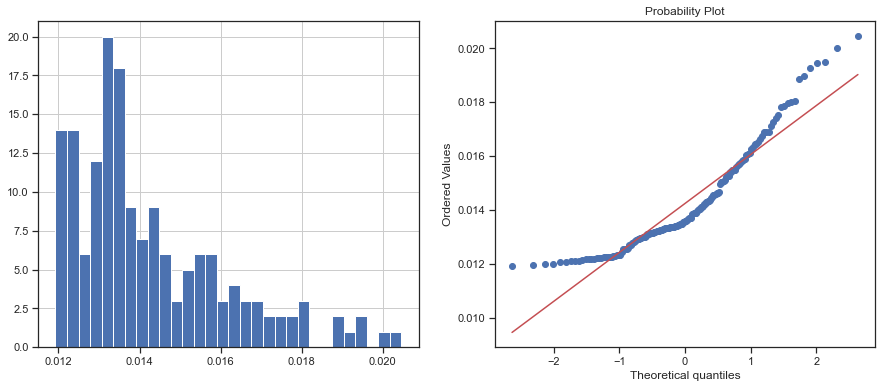

In [37]:
data_clean['Life_expectancy_reciprocal'] = 1 / (data_clean['Life_expectancy']) 
diagnostic_plots(data_clean, 'Life_expectancy_reciprocal')

Квадратный корень

C:\Users\23882\AppData\Local\Temp\ipykernel_3248\44588248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['GDP_per_capita_sqr'] = data_clean['GDP_per_capita']**(1/2)


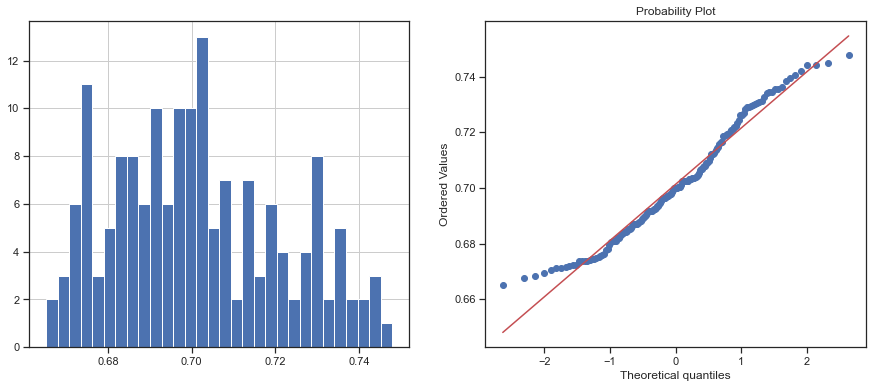

In [29]:
data_clean['GDP_per_capita_sqr'] = data_clean['GDP_per_capita']**(1/2) 
diagnostic_plots(data_clean, 'GDP_per_capita_sqr')

Возведение в степень

C:\Users\23882\AppData\Local\Temp\ipykernel_3248\1123138333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_exp1']=data_clean['Life_expectancy']**(1/1.5)


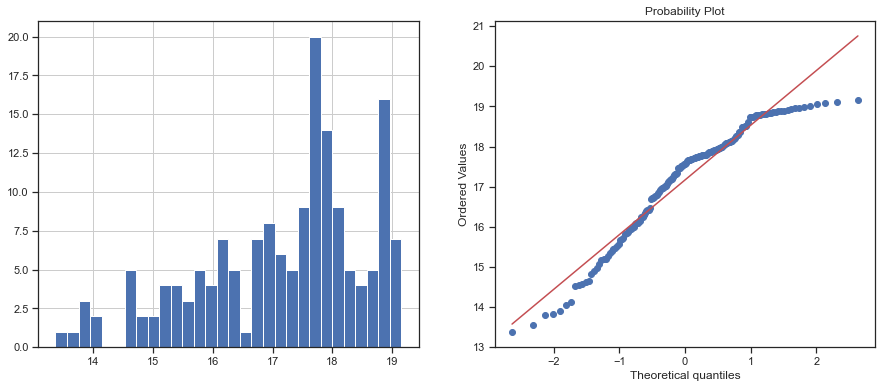

In [38]:
data_clean['Life_expectancy_exp1']=data_clean['Life_expectancy']**(1/1.5)
diagnostic_plots(data_clean, 'Life_expectancy_exp1')

C:\Users\23882\AppData\Local\Temp\ipykernel_3248\3357197014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_exp2'] = data_clean['Life_expectancy']**(2)


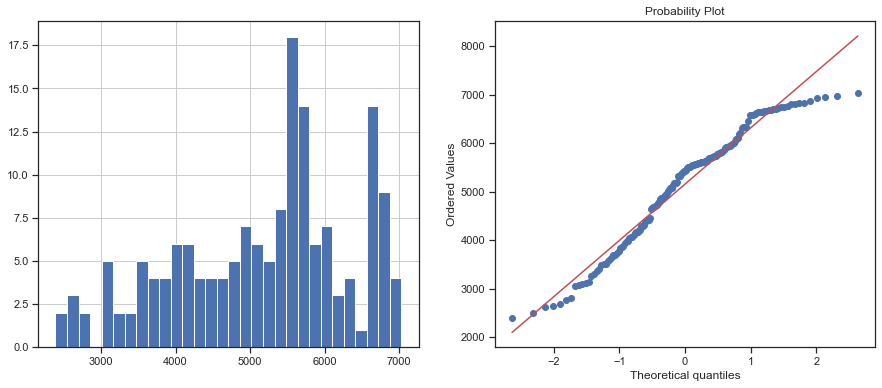

In [39]:
data_clean['Life_expectancy_exp2'] = data_clean['Life_expectancy']**(2)
diagnostic_plots(data_clean, 'Life_expectancy_exp2')

C:\Users\23882\AppData\Local\Temp\ipykernel_3248\674572020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_exp3'] = data_clean['Life_expectancy']**(0.333)


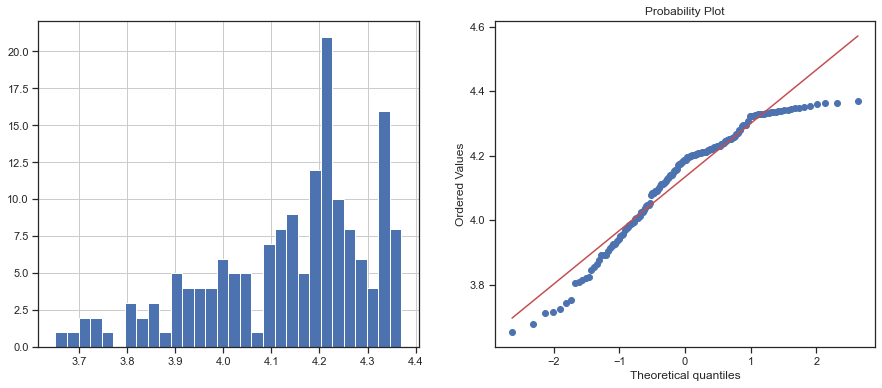

In [40]:
data_clean['Life_expectancy_exp3'] = data_clean['Life_expectancy']**(0.333)
diagnostic_plots(data_clean, 'Life_expectancy_exp3')

Преобразование Бокса-Кокса

Оптимальное значение λ = 3.421322819550941


C:\Users\23882\AppData\Local\Temp\ipykernel_3248\1567032715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_boxcox'], param = stats.boxcox(data_clean['Life_expectancy'])


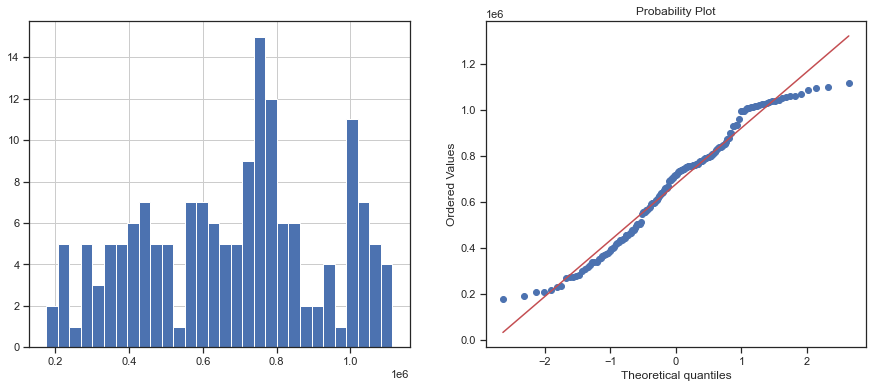

In [36]:
data_clean['Life_expectancy_boxcox'], param = stats.boxcox(data_clean['Life_expectancy']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_clean, 'Life_expectancy_boxcox')

Преобразование Йео-Джонсона

C:\Users\23882\AppData\Local\Temp\ipykernel_3248\3146306289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy'] = data_clean['Life_expectancy'].astype('float')
C:\Users\23882\AppData\Local\Temp\ipykernel_3248\3146306289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Life_expectancy_yeojohnson'], param = stats.yeojohnson(data_clean['Life_expectancy'])


Оптимальное значение λ = 3.4599386609280987


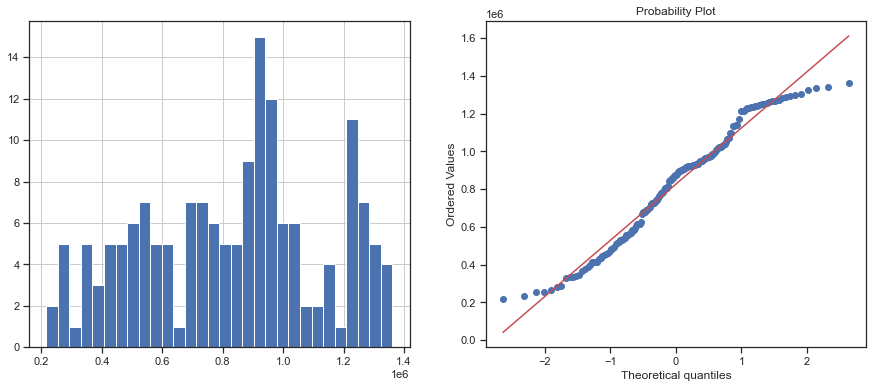

In [43]:
data_clean['Life_expectancy'] = data_clean['Life_expectancy'].astype('float')
data_clean['Life_expectancy_yeojohnson'], param = stats.yeojohnson(data_clean['Life_expectancy']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_clean, 'Life_expectancy_yeojohnson')

Из результатов преобразования видно, что средняя продолжительность жизни в мире не имеет характеристик нормального распределения